<a href="https://colab.research.google.com/github/engelbertavania/Multimedia-Computing/blob/main/Lab_mini_project_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout,BatchNormalization,Dropout
from keras.utils import image_dataset_from_directory

In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'intel-image-classification:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F111880%2F269359%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240815%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240815T065928Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D70d93c3dd2c1e4df23cccd727ccb7e68c4329d33c8a7b21650911db28d27a85c26530d29a8ed332544f467d402d7c2eb1b44a09357c4e9bc06df2af42c8b6390d7bd481514bb569b3839c6cd6bcaff0fe2b37e56204fc67206c94a59afdeb014d2c5ced85c3a40610e877b644780a17ebdfe4774f49a2becab613b6bcd1a7772e0c777213979230edc20104bd34319b5e9a19698883416647c9ec4f51b50a25f021c82b498593abcabfa1a1d66b30b9c817eadf718c3f9e2e456c7f0e5d89b985b6dcc44c1c44d9ff765efaa5bd78ad8f571aa44058463ad4096debe7b661aa51113946dc8c995b9a9ae4e0f5bde609a52ef53f3eeae79fa97b51079fd57300a'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 363152213 bytes downloaded
Downloaded and uncompressed: intel-image-classification
Data source import complete.


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Streaming output truncated to the last 5000 lines.
/kaggle/input/intel-image-classification/seg_pred/seg_pred/4236.jpg
/kaggle/input/intel-image-classification/seg_pred/seg_pred/7394.jpg
/kaggle/input/intel-image-classification/seg_pred/seg_pred/23583.jpg
/kaggle/input/intel-image-classification/seg_pred/seg_pred/19521.jpg
/kaggle/input/intel-image-classification/seg_pred/seg_pred/6291.jpg
/kaggle/input/intel-image-classification/seg_pred/seg_pred/15458.jpg
/kaggle/input/intel-image-classification/seg_pred/seg_pred/7804.jpg
/kaggle/input/intel-image-classification/seg_pred/seg_pred/15081.jpg
/kaggle/input/intel-image-classification/seg_pred/seg_pred/1949.jpg
/kaggle/input/intel-image-classification/seg_pred/seg_pred/11793.jpg
/kaggle/input/intel-image-classification/seg_pred/seg_pred/17659.jpg
/kaggle/input/intel-image-classification/seg_pred/seg_pred/20404.jpg
/kaggle/input/intel-image-classification/seg_pred/seg_pred/4366.jpg
/kaggle/input/intel-image-classification/seg_pred/seg_pred

In [ ]:
# Define the path to your dataset
train_path = '/kaggle/input/intel-image-classification/seg_train/seg_train'

# Specify the subset of classes you want to include
subset_classes = ['buildings', 'sea', 'forest', 'glacier', 'mountain', 'street']

In [ ]:
# Create a new directory for the subset of classes
train_path_sub = '/kaggle/working/seg_train_sub_august6'
if not os.path.exists(train_path_sub):
    os.makedirs(train_path_sub)

In [ ]:
# Copy the subset of classes to the new directory
for class_name in subset_classes:
    class_path = os.path.join(train_path, class_name)
    subset_class_path = os.path.join(train_path_sub, class_name)
    os.symlink(class_path, subset_class_path)   # Create a symbolic link to save space

In [ ]:
#Import deep learning libraries
import torch
from torchvision import transforms, datasets
from torch.utils.data import DataLoader, random_split

In [ ]:
# Define the transformations
transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),  # Convert to grayscale
    transforms.Resize((150, 150)),                # Resize images to 150x150
    transforms.ToTensor(),                        # Convert images to tensors
    transforms.Normalize(mean=[0.5], std=[0.5])   # Normalize images to [0, 1]
])

In [ ]:
# Create the training dataset using ImageFolder
train_dataset = datasets.ImageFolder(root=train_path_sub, transform=transform)


In [ ]:
# Define batch size
batch_size = 32
# Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

In [ ]:
# Example: Iterate over a few batches
for images, labels in train_loader:
    print(images.shape, labels.shape)
    break

torch.Size([32, 1, 150, 150]) torch.Size([32])


In [ ]:
import matplotlib.pyplot as plt

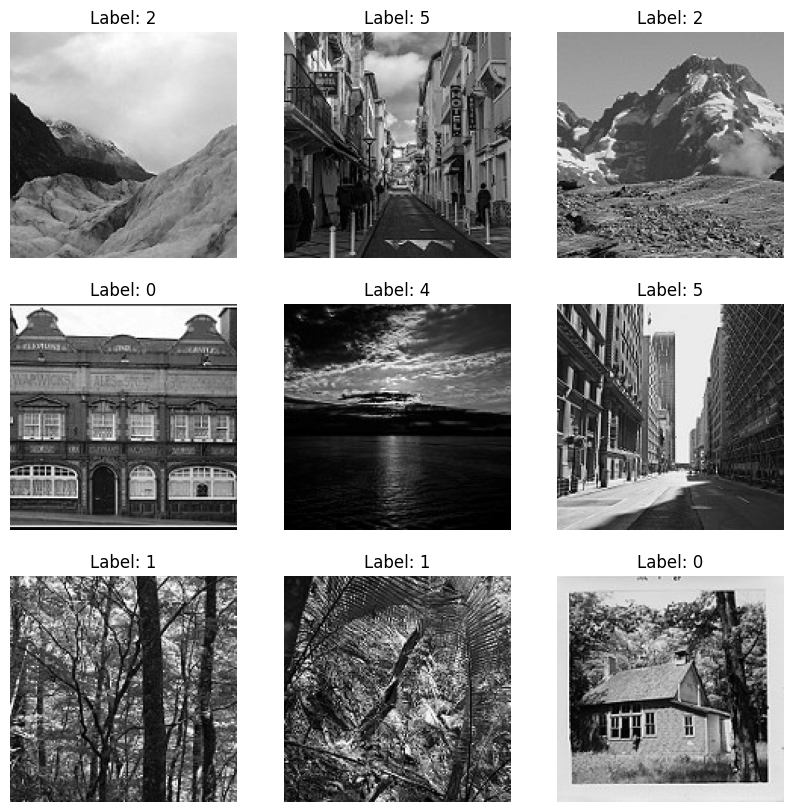

In [ ]:
# Check some examples
for images, labels in train_loader:
    # Denormalize the images for plotting
    images = images * 0.5 + 0.5

    # Plot the images
    plt.figure(figsize=(10, 10))
    for i in range(9):  # Plot 9 images
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i][0], cmap='gray')  # images[i][0] for grayscale images
        plt.title(f"Label: {labels[i].item()}")
        plt.axis('off')
    plt.show()
    break

In [ ]:
# Iterate through data
for images, labels in train_loader:
    print('Image batch dimensions:', images.shape)
    print('Image label dimensions:', labels.shape)
    break

Image batch dimensions: torch.Size([32, 1, 150, 150])
Image label dimensions: torch.Size([32])
